In [53]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [20]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


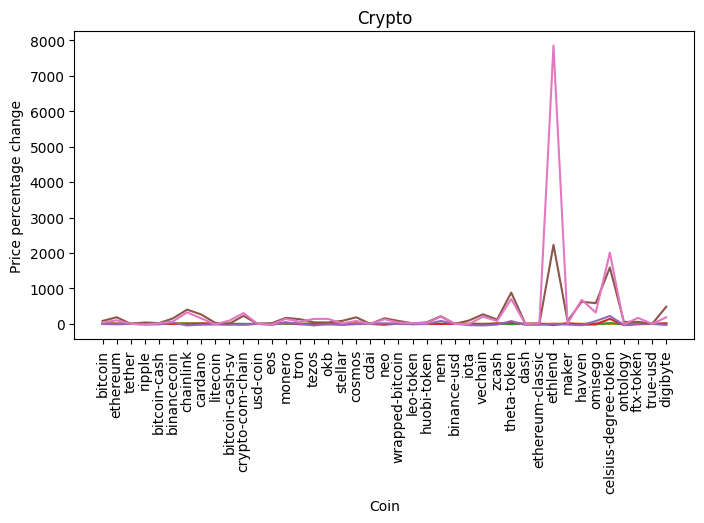

In [29]:
# Plot your data to see what's in your DataFrame
plt.figure(figsize=(8, 4))
plt.plot(df_market_data.index, df_market_data.values)
plt.xticks(rotation=90)
plt.ylabel('Price percentage change')
plt.xlabel('Coin')
plt.title('Crypto')

# Show the plot
plt.show()

---

### Prepare the Data

In [31]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Select the columns to normalize
columns_to_normalize = ['price_change_percentage_24h', 'price_change_percentage_7d',
                        'price_change_percentage_14d', 'price_change_percentage_30d',
                        'price_change_percentage_60d', 'price_change_percentage_200d',
                        'price_change_percentage_1y']

# Create a new DataFrame for normalized data
df_normalized = df_market_data.copy()

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Normalize the selected columns
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

df_normalized.head(5)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [32]:
# Create a list with the number of k-values from 1 to 11

k_values = list(range(1, 12))

In [34]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k)

    # 2. Fit the model to the data
    kmeans_model.fit(df_normalized)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [39]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': list(range(1, 12)), 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

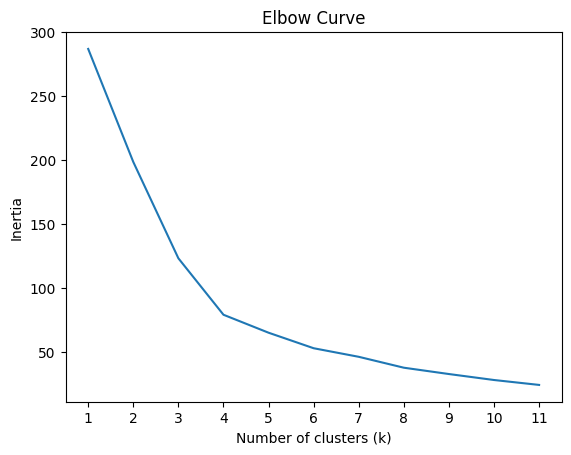

In [37]:
# Plot the Elbow curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.xticks(df_elbow['k'])
plt.show()


#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [40]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4)


In [41]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [43]:
# Predict the clusters
cluster_labels = kmeans_model.predict(df_normalized)

# Print the resulting array of cluster values
print(cluster_labels)


[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [45]:
# Create a copy of the DataFrame
df2_normalized = df_normalized

df2_normalized.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
iota,0.259097,0.249508,-0.478953,-0.218997,-0.735815,-0.329179,-0.285310
monero,0.262723,1.792602,2.202665,1.437842,0.893865,-0.155893,-0.167644
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
leo-token,0.051758,-0.928381,-0.871918,0.058782,-0.159250,-0.512071,-0.265036
nem,-0.217984,-0.849381,0.297632,-0.199820,1.773127,-0.047361,-0.119226
cosmos,-0.255978,1.840274,0.643565,0.116538,-0.151913,-0.117565,-0.215191


In [49]:
# Add a new column to the DataFrame with the predicted clusters
df2_normalized['Cluster'] = cluster_labels

# Display sample data
df2_normalized.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
okb,-0.923203,-1.437359,-0.629963,-0.460558,-0.058504,-0.457283,-0.166900,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,3
eos,0.155710,-0.922491,0.115024,-0.237488,-0.642837,-0.508220,-0.296330,0
huobi-token,-0.052032,-0.457229,0.032522,-0.184489,-0.070809,-0.451982,-0.262140,0
nem,-0.217984,-0.849381,0.297632,-0.199820,1.773127,-0.047361,-0.119226,0
usd-coin,0.034352,-0.733026,-0.023140,-0.065775,0.002925,-0.550599,-0.282232,0
cosmos,-0.255978,1.840274,0.643565,0.116538,-0.151913,-0.117565,-0.215191,3
true-usd,0.078038,-0.687745,-0.009191,-0.058214,0.007388,-0.550441,-0.281747,0
omisego,1.919812,0.370447,-1.619761,-0.409716,1.696480,0.811207,-0.021888,0


<ipython-input-58-da7ec9c0fb0b>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(cluster_labels.unique()))(cluster_labels)


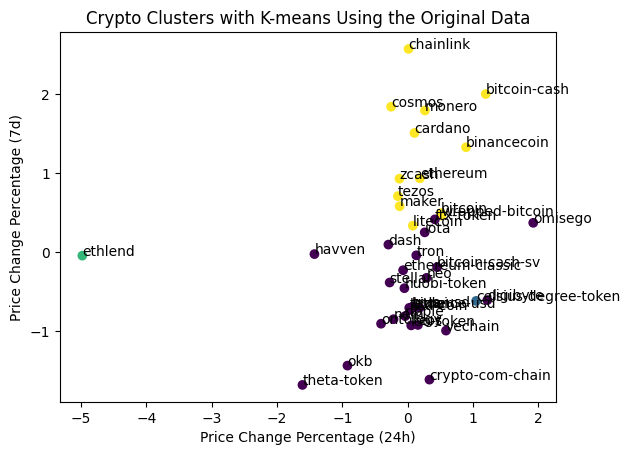

In [58]:
# Set the x and y variables
x = df2_normalized["price_change_percentage_24h"]
y = df2_normalized["price_change_percentage_7d"]

# Set the color of the graph points based on the cluster labels
cluster_labels = df2_normalized["Cluster"]
colors = plt.cm.get_cmap('viridis', len(cluster_labels.unique()))(cluster_labels)

# Create the scatter plot
plt.scatter(x, y, c=colors)

# Add the crypto name as index annotations
for i, name in enumerate(df2_normalized.index):
    plt.annotate(name, (x[i], y[i]))

# Set the labels and title
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")
plt.title("Crypto Clusters with K-means Using the Original Data")

# Show the plot
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [ ]:
# Create a PCA model instance and set `n_components=3`.


In [ ]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.

# View the first five rows of the DataFrame.


In [ ]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**

In [ ]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


---

### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values from 1 to 11


In [ ]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


In [ ]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.


#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k


In [ ]:
# Fit the K-Means model using the PCA data

In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.


In [ ]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
# Composite plot to contrast the Elbow curves

In [ ]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**